<a href="https://colab.research.google.com/github/mldmort/Mortazavi2021_B6B10/blob/main/Colab_Notebooks/WDFY1_splicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To run this script

---
Upload the file `rpkm_KO_WT_normalized_CPM1.txt` from [here](https://drive.google.com/drive/u/1/folders/1g6WIabQRq3H0IpUBDZSswbRIbpRDYjY6) into the content folder of this page.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
from scipy import stats

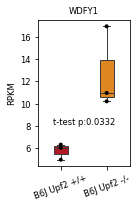

In [2]:
expr_file = 'rpkm_KO_WT_normalized_CPM1.txt'
expr_data = pd.read_table(expr_file, sep='\t', header=0)

samples = ['ASR324', 'ASR325', 'ASR326', 'ASR327', 'ASR328', 'ASR329']
Groups = ['KO', 'KO', 'KO', 'WT', 'WT', 'WT']
expr_data['Sample'] = samples
expr_data['Group'] = Groups

expr_wdfy1 = expr_data[['Group', 'Sample', 'ENSMUSG00000073643']]

t, p = stats.ttest_ind(expr_wdfy1.loc[expr_wdfy1.Group=='KO', 'ENSMUSG00000073643'], expr_wdfy1.loc[expr_wdfy1.Group=='WT', 'ENSMUSG00000073643'])

fig = plt.figure()
ax = sb.boxplot(x='Group', y='ENSMUSG00000073643', data=expr_wdfy1, palette=['#CC0011', '#FF8800'], width=0.3, dodge=False, order=['WT', 'KO'], linewidth=1)
ax = sb.swarmplot(x='Group', y='ENSMUSG00000073643', data=expr_wdfy1, color='black', size=4, order=['WT', 'KO'])
plt.text(0.5, 0.3, str('t-test p:{:.4f}'.format(p)), ha='center', va='center', transform=ax.transAxes, fontsize='small')
ax.set_xlabel(None)
ax.set_ylabel('RPKM', fontsize='small')
ax.set_title('WDFY1', fontsize='small')
ax.set_xticklabels(['B6J Upf2 +/+', 'B6J Upf2 -/-'], rotation=20, fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
AR = 1.7
dy = 14.
dx = 2.
ax.set_aspect(AR/(dy/dx))
fig.set_size_inches((1.8,2.7))
plt.show()


# The splice junction counts below come from sashimi plots in IGV for each sample.

In [3]:
junc_names = ['1->2', '2->3', '3->4a', '4a->5a', '5a->6a', '6a->4b', '4b->5b', '5b->6b', '6b->7', '7->8', '8->9', '9->10', '10->11', '11->12']

KO_24 = np.array([144, 188, 110, 165, 206, 45 , 136, 253, 242, 166, 125, 135, 153, 104], dtype=float)
KO_25 = np.array([116, 132, 94 , 182, 246, 108, 165, 306, 176, 144, 128, 136, 131, 92 ], dtype=float)
KO_26 = np.array([167, 223, 187, 312, 422, 132, 283, 499, 412, 236, 192, 216, 253, 153], dtype=float)
WT_27 = np.array([28 , 26 , 33 , 76 , 62 , 25 , 58 , 92 , 59 , 36 , 27 , 27 , 25 , 14 ], dtype=float)
WT_28 = np.array([47 , 61 , 72 , 96 , 116, 6  , 57 , 141, 123, 89 , 61 , 83 , 66 , 62 ], dtype=float)
WT_29 = np.array([72 , 81 , 63 , 87 , 88 , 12 , 62 , 96 , 98 , 73 , 50 , 57 , 66 , 40 ], dtype=float)

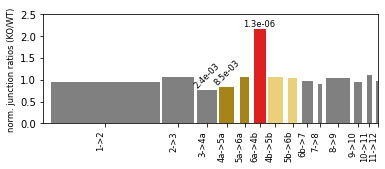

In [4]:
KO = KO_24 + KO_25 + KO_26
WT = WT_27 + WT_28 + WT_29

KO_sum = KO.sum()
WT_sum = WT.sum()

data_dict = {'KO':KO/KO_sum, 'WT':WT/WT_sum}
data = pd.DataFrame(data=data_dict)
data['junc'] = junc_names
data['KO_over_WT'] = data['KO']/data['WT']

#========================== changing widths of the seaborn boxplot =====================
exonStarts=np.array([79702261,79706243,79707451,79709092,79713857,79714873,79717202,79719123,79722213,79724644,79726565,79729655,79733799,79740061,79761563], dtype=float)
exonEnds  =np.array([79705570,79706352,79707582,79709194,79713963,79715000,79717315,79719274,79722268,79724757,79726716,79729710,79733873,79740129,79761769], dtype=float)

exonWidths=(exonEnds - exonStarts)/4.
intronWidths=(exonStarts[1:] - exonEnds[:-1])/30.

### reverse order
exonWidths = exonWidths[::-1]
intronWidths = intronWidths[::-1]

exonCenters = []
for i in range(15):
    ex_c = 0.
    for j in range(0,i):
        ex_c += exonWidths[j]+intronWidths[j]
    ex_c += exonWidths[i]/2.
    exonCenters.append(ex_c)
exonCenters = np.array(exonCenters)

intronCenters = []
for i in range(14):
    in_c = 0.
    for j in range(0,i):
        in_c += exonWidths[j]+intronWidths[j]
    in_c += exonWidths[i] + intronWidths[i]/2.
    intronCenters.append(in_c)
intronCenters = np.array(intronCenters)

fig = plt.figure()
palette = ['gray', 'gray', 'gray', '#BF9000', '#BF9000', 'red', '#FFD966', '#FFD966', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray']
ax = sb.barplot(x='junc', y='KO_over_WT', data=data, palette=palette)
ax.set_xticks(intronCenters)

for bar,newwidth,newcenter in zip(ax.patches,intronWidths,intronCenters):
    bar.set_x(newcenter-newwidth/2.)
    bar.set_width(newwidth)

ax.set_xlabel(None)
ax.set_ylabel('norm. junction ratios (KO/WT)', fontsize='small')
xticks_loc = ax.get_xticks()
for ix, xloc in enumerate(xticks_loc):
    index = data.index.tolist()[ix]
    table = np.array([[KO[ix], KO_sum-KO[ix]], [WT[ix], WT_sum-WT[ix]]])
    chi2, pv, dof, exp = stats.chi2_contingency(table)
    if pv<5e-2 and pv>1e-3:
        ax.text(xticks_loc[ix], data.loc[index, 'KO_over_WT']+0.05, '{:.1e}'.format(pv), ha='center', rotation=45, fontsize='small')
    elif pv<1e-3:
        ax.text(xticks_loc[ix], data.loc[index, 'KO_over_WT']+0.05, '{:.1e}'.format(pv), ha='center', rotation=0, fontsize='small')
ax.set_ylim(0, 2.5)
AR = 0.4
dy = 2.5
dx = intronCenters[-1] - intronCenters[0]
ax.set_aspect(AR/(dy/dx))
xticks = ax.get_xticklabels()
ax.set_xticklabels(xticks, rotation=90, ha='right', fontsize='small')
plt.show()